In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from functions import *

In [2]:
mp.mp.dps = 30
mp.mp.pretty = False

In [3]:
r = 2.9
x0 = .3
logistic_map(r, x0)

mpf('0.60899999999999996846966610064549')

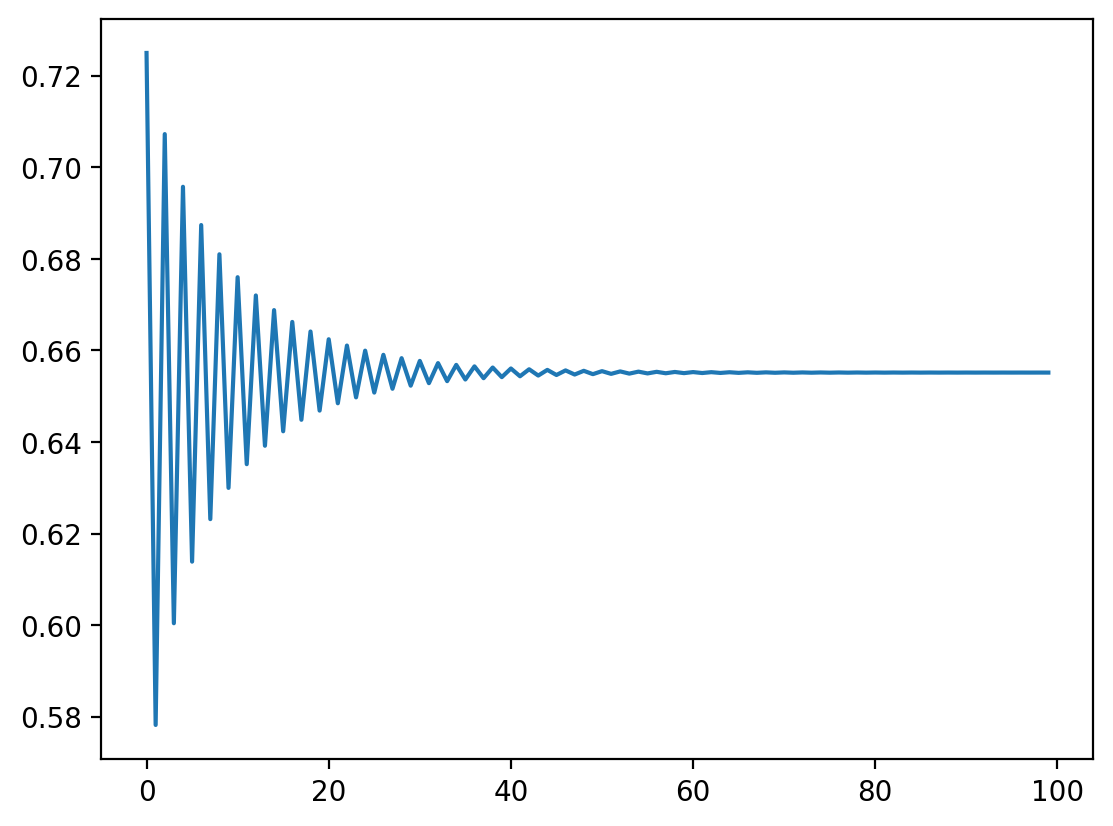

In [13]:
r = 2.9
x0 = .5
N = 100

series = generate_series(r, x0, N)
plt.plot(series, marker='');

In [18]:
r = 3
x0 = .5
N = 1000

series = generate_series(r, x0, N)[-100:]

series

array([mpf('0.674376975318138170759327447423957'),
       mpf('0.658778011436692293602094473020145'),
       mpf('0.6743686292526288336448880069643'),
       mpf('0.658786743397677816597366849436195'),
       mpf('0.674360310363480060960473716170215'),
       mpf('0.658795446509852722956324166462669'),
       mpf('0.674352018503209508003166995477983'),
       mpf('0.658804120931569468057504676850205'),
       mpf('0.674343753525454379834094140930681'),
       mpf('0.658812766819966840508312144828545'),
       mpf('0.674335515284960518166527755130761'),
       mpf('0.658821384330981892621021677543623'),
       mpf('0.674327303637571618081292658342128'),
       mpf('0.658829973619361727883760592156756'),
       mpf('0.674319118440218572747106898154273'),
       mpf('0.658838534838675147447655755397692'),
       mpf('0.674310959550908944352955099616807'),
       mpf('0.65884706814132415761845057770693'),
       mpf('0.674302826828716559488518025590398'),
       mpf('0.65885557367855534030

In [26]:
rounded_series = array_round(series, 3)
rounded_series

array([mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.658999999999999999999999999999973'),
       mpf('0.673999999999999999999999999999961'),
       mpf('0.65899999999999999

In [27]:
np.unique(rounded_series).size

2

In [28]:
from collections import Counter
len(Counter(rounded_series))

2

Unique counts = 100


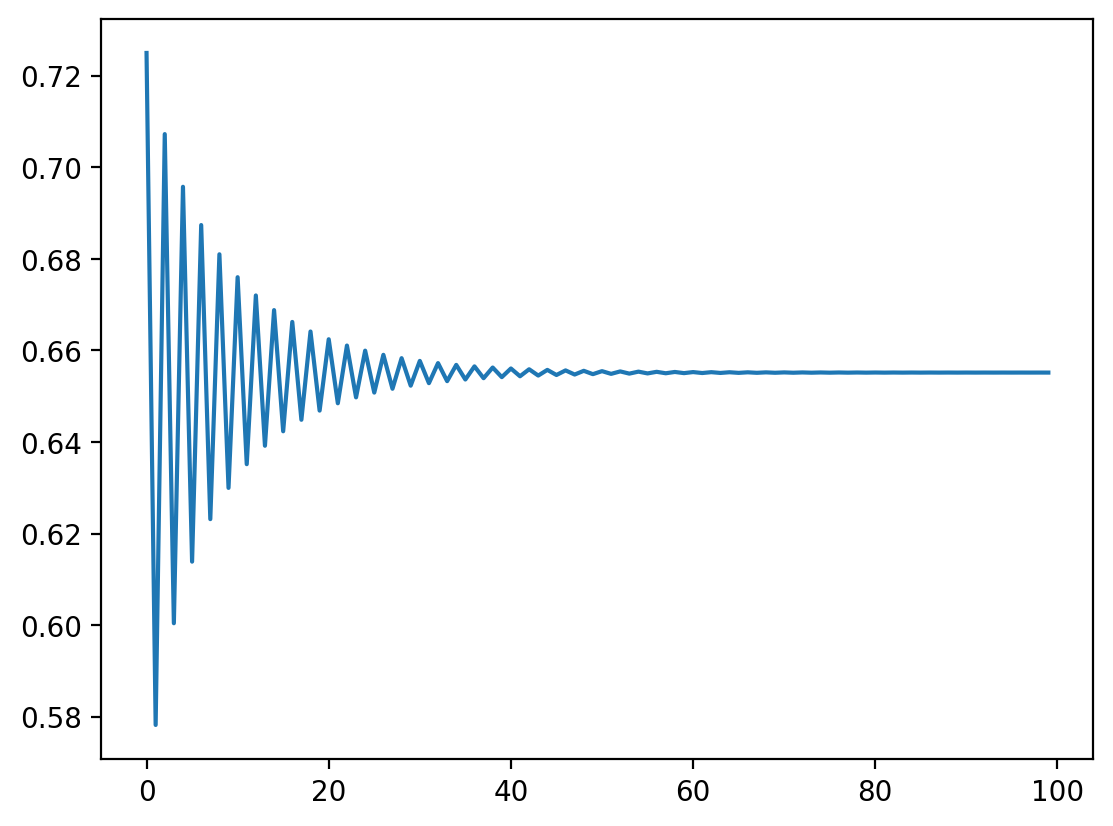

In [8]:
r = 2.9
N = 1000

series = generate_series(r, 0.5, N)
rounded_series = array_round(series, 3)
unique_values = np.unique(rounded_series)
unique_count = len(unique_values)
print("Unique counts =", unique_count)
plt.plot(series, marker='');

In [32]:
parameter_range = (0.9, 4) 

parameter_values = np.linspace(*parameter_range, 100)
for parameter in parameter_values:
    
    series = generate_series(parameter, 0.5, 1000000)[-500:]
    unique_values = np.unique(array_round(series, 4))
    unique_count = len(unique_values)
    #unique_count = len(Counter(series)) 
    print(f"{unique_count}     {mp.nstr(parameter, 5)}")

500     0.9
500     0.9313131313131313
500     0.9626262626262626
500     0.9939393939393939
1     1.0252525252525253
1     1.0565656565656565
1     1.087878787878788
1     1.1191919191919193
1     1.1505050505050505
1     1.1818181818181819
1     1.213131313131313
1     1.2444444444444445
1     1.2757575757575759
1     1.307070707070707
1     1.3383838383838385
1     1.3696969696969696
1     1.401010101010101
1     1.4323232323232324
1     1.4636363636363636
1     1.494949494949495
1     1.5262626262626262
1     1.5575757575757576
1     1.588888888888889
1     1.6202020202020202
1     1.6515151515151514
1     1.6828282828282828
1     1.7141414141414142
1     1.7454545454545456
1     1.7767676767676768
1     1.808080808080808
1     1.8393939393939394
1     1.8707070707070708
1     1.9020202020202022
1     1.9333333333333336
1     1.9646464646464645
1     1.995959595959596
1     2.0272727272727273
1     2.0585858585858587
1     2.08989898989899
1     2.121212121212121
1     2.1525252525

In [ ]:
parameter_range = (0.9, 4)

bifurcation_points = find_bifurcation_points(parameter_range)
intervals = np.diff(bifurcation_points)
ratios = differences[:-1] / differences[1:]  # Exclude the last element to avoid division by zero
np.mean(ratios[-10:]) # Average the last few ratios for better convergence

# Bifurcation digram

In [ ]:
n = 10000
rrange = (.9, 4)
r = np.linspace(*rrange, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True, dpi=100)
for i in range(iterations):
    
    x = logistic_map(r, x)
    
    # compute the partial sum of the Lyapunov exponent
    lyapunov += np.log(abs(r - 2 * r * x))
    
    ### display the bifurcation diagram
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlim(*rrange)
ax1.set_title("Bifurcation diagram")


### display the Lyapunov exponent

# horizontal line
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# negative Lyapunov exponent
ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations, '.k', alpha=.5, ms=.5)

# positive Lyapunov exponent
ax2.plot(r[lyapunov >= 0],  lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_xlim(*rrange)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")

plt.tight_layout()

# Feigenbaum constant convergence

In [12]:
max_it = 13
max_it_j = 10
a1 = 1.0
a2 = 0.0
d1 = 3.2
a = 0.0

print (" i       d")
for i in range(2, max_it + 1):
    a = a1 + (a1 - a2) / d1
    for j in range(1, max_it_j + 1):
        x = 0.0
        y = 0.0
        for k in range(1, (1 << i) + 1):
            y = 1.0 - 2.0 * y * x
            x = a - x * x
        a = a - x / y
    d = (a1 - a2) / (a - a1)
    print("{0:2d}    {1:.8f}".format(i, d))
    d1 = d
    a2 = a1
    a1 = a

 i       d
 2    3.21851142
 3    4.38567760
 4    4.60094928
 5    4.65513050
 6    4.66611195
 7    4.66854858
 8    4.66906066
 9    4.66917155
10    4.66919515
11    4.66920026
12    4.66920098
13    4.66920537
